In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import mlxtend

In [2]:
df = pd.read_csv('./placement_data.csv')
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df = df.iloc[:,1:]

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.isna().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [9]:
x = df.iloc[: , 0:2]
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
y = df.iloc[: , 2]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.2)

In [16]:
y_test

56    0
42    1
93    1
23    0
12    0
     ..
15    0
28    0
14    0
4     0
3     1
Name: placement, Length: 80, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.30200201,  0.16248418],
       [ 0.19414415, -0.65676378],
       [-0.88443445, -1.72178612],
       [-0.88443445, -0.21983154],
       [ 0.19414415,  0.62672469],
       [-0.45300301, -0.52022245],
       [ 1.16486488,  0.35364203],
       [-1.63943946,  2.01944622],
       [ 1.81201204, -1.77640265],
       [-0.99229231, -1.77640265],
       [-0.99229231,  0.21710071],
       [ 0.19414415, -0.05598194],
       [ 0.30200201,  0.81788254],
       [ 0.73343344, -0.98446296],
       [ 0.94914916,  1.52789744],
       [-1.31586588,  0.54479989],
       [ 1.81201204,  0.87249907],
       [-0.12942943,  0.3809503 ],
       [-1.20800802, -0.13790674],
       [ 0.8412913 ,  0.32633377]])

In [19]:
x_test = scaler.transform(x_test)
x_test

c:\Users\Satyam\Desktop\Data_Science\satyam\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[  6.1,  65. ],
       [  7.6,  89. ],
       [  6.8, 112. ],
       [  4.7,  87. ],
       [  5.4, 139. ],
       [  6.9, 138. ],
       [  6. ,  66. ],
       [  5.3, 121. ],
       [  4.4, 149. ],
       [  6.6, 120. ],
       [  4.9, 155. ],
       [  4.8, 112. ],
       [  5.4, 114. ],
       [  7.6, 128. ],
       [  7.3,  86. ],
       [  7. , 139. ],
       [  7.5, 130. ],
       [  4.9, 196. ],
       [  6.9,  96. ],
       [  3.9, 109. ],
       [  7.8, 114. ],
       [  4.8, 169. ],
       [  5. ,  91. ],
       [  4.8, 163. ],
       [  4.4,  42. ],
       [  5.3, 114. ],
       [  7.1, 151. ],
       [  6.5, 130. ],
       [  4.9, 151. ],
       [  4. ,  75. ],
       [  5.7, 132. ],
       [  8.1, 149. ],
       [  3.3, 183. ],
       [  6. ,  45. ],
       [  6.5, 160. ],
       [  7. ,  64. ],
       [  8.1, 166. ],
       [  5.2, 161. ],
       [  4.9, 120. ],
       [  6.3, 127. ],
       [  8. ,  79. ],
       [  6.4, 141. ],
       [  4.7,  52. ],
       [  7

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### `Model Training`

In [22]:
model.fit(x_train , y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
y_test

56    0
42    1
93    1
23    0
12    0
     ..
15    0
28    0
14    0
4     0
3     1
Name: placement, Length: 80, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.525

In [35]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

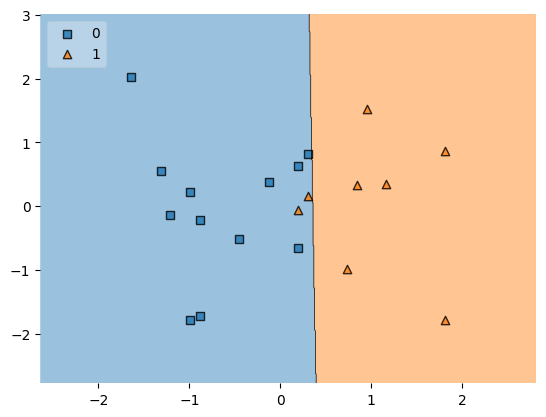

In [36]:
plot_decision_regions(x_train , y_train.values , clf = model , legend=2)

### `Pick the model as a file for deployment`

In [37]:
import pickle

In [38]:
pickle.dump(model , open('model.pkl' , 'wb'))

In [50]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.81it/s]
